# Generating all the XGBoost models for all target rows

In [1]:
from xgboost import XGBRegressor
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
results = pd.DataFrame(columns=['Model', 'mse', 'mae', 'rmse', 'mape', 'r2']).dropna()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score


def appendError(model, testy, y_pred):
    # model_name = str(type(model).__name__)
    mse = mean_squared_error(testy, y_pred)
    mae = mean_absolute_error(testy, y_pred)
    rmse = root_mean_squared_error(testy, y_pred)
    mape = mean_absolute_percentage_error(testy, y_pred)
    r2 = r2_score(testy, y_pred)
    return pd.DataFrame([{
        'Model': model,
        'mse': mse, 
        'mae': mae, 
        'rmse': rmse, 
        'mape': mape, 
        'r2': r2
    }])

In [3]:
scaler = StandardScaler()
specs = ["dart", "exact", 5, 3]

In [4]:
data = pd.read_csv('data/set.csv').drop(columns=['DateTime'])

In [5]:
targets = data.columns[:5]

In [6]:
data_train, data_test = train_test_split(data, test_size=.2)
for i in targets:
    X_train = scaler.fit_transform(data_train.drop(i, axis=1))
    # print(data_train.drop(i, axis=1).columns)
    y_train = data_train[i]
    X_test = scaler.fit_transform(data_test.drop(i, axis=1))
    y_test = data_test[i]
    bst = XGBRegressor(booster=specs[0], tree_method=specs[1], max_depth=specs[2], gamma=specs[3])
    bst.fit(X_test, y_test)
    preds = bst.predict(X_test)
    results = pd.concat([results, appendError(i, y_test, preds)])
    bst.save_model('models/'+i+'.json')
results.tail(5)

/tmp/ipykernel_5311/547652173.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, appendError(i, y_test, preds)])


,Model,mse,mae,rmse,mape,r2
0,PT08.S1(CO),117.535908,8.047564,10.841398,0.007528,0.996728
0,PT08.S2(NMHC),86.830392,6.950406,9.318283,0.007791,0.998392
0,PT08.S3(NOx),78.722198,6.537125,8.872553,0.008260,0.998166
0,PT08.S4(NO2),88.294848,6.912219,9.396534,0.004966,0.999124
0,PT08.S5(O3),958.653141,23.012450,30.962124,0.025051,0.991976


In [7]:
co = xgb.XGBRegressor()
co.load_model('models/PT08.S1(CO).json')

In [8]:
predes = co.predict(scaler.fit_transform(pd.DataFrame({
    'PT08.S2(NMHC)': [1743.000000],
    'PT08.S3(NOx)': [1502.000000],
    'PT08.S4(NO2)': [2299.000000],
    'PT08.S5(O3)': [2032.000000],
    'T': [44.600000],
    'RH': [88.700000],
    'AH': [2.231000],
    'datetimestamp': [109942]
})))
predes

array([987.0222], dtype=float32)

In [38]:
data.describe()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetimestamp
count,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000,8445.000000
mean,1092.359029,932.434458,821.057312,1447.627709,1011.712729,18.549378,49.010456,1.032656,304382.688928
std,193.107070,237.381881,209.249129,319.833186,355.629559,8.911049,17.501173,0.404614,2695.977498
min,667.000000,440.000000,360.000000,605.000000,288.000000,-1.900000,9.200000,0.186200,299706.000000
25%,942.000000,745.000000,667.000000,1236.000000,744.000000,12.000000,35.300000,0.741700,302078.000000
50%,1063.000000,909.000000,805.000000,1464.000000,964.000000,18.000000,49.200000,1.004100,304330.000000
75%,1217.000000,1100.000000,955.000000,1663.000000,1248.000000,24.700000,62.600000,1.321900,306735.000000
max,1642.000000,1643.000000,1402.000000,2299.000000,2032.000000,44.600000,88.700000,2.231000,309062.000000


In [9]:
X_train = scaler.fit_transform(data_train.drop('PT08.S2(NMHC)', axis=1))
y_train = data_train['PT08.S2(NMHC)']
X_test = scaler.fit_transform(data_test.drop('PT08.S2(NMHC)', axis=1))
y_test = data_test['PT08.S2(NMHC)']
bst = XGBRegressor(booster=specs[0], tree_method=specs[1], max_depth=specs[2], gamma=specs[3])
bst.fit(X_test, y_test)
preds = bst.predict(X_test)
results = pd.concat([results, appendError('PT08.S2(NMHC)', y_test, preds)])
bst.save_model('model.json')
results

,Model,mse,mae,rmse,mape,r2
0,PT08.S1(CO),111.026819,7.820760,10.536926,0.007287,0.997173
0,PT08.S2(NMHC),75.699639,6.460751,8.700554,0.007222,0.998653
0,PT08.S3(NOx),79.929174,6.556953,8.940312,0.008412,0.998146
0,PT08.S4(NO2),75.569513,6.463640,8.693073,0.004597,0.999273
0,PT08.S5(O3),832.706025,21.073278,28.856646,0.022921,0.993747
0,PT08.S2(NMHC),75.699639,6.460751,8.700554,0.007222,0.998653


In [24]:
co = xgb.XGBRegressor()
co.load_model('model.json')
size = 4
# datata = scaler.fit_transform(pd.DataFrame({
#     'P1': np.random.uniform(1000, 2000, size=size),
#     'P2': np.random.uniform(400, 600, size=size),
#     'P3': np.random.uniform(1000, 1500, size=size),
#     'P4': np.random.uniform(1500, 2000, size=size),
#     'T': np.random.uniform(10, 20, size=size),
#     'RH': np.random.uniform(40, 60, size=size),
#     'AH': np.random.uniform(0.7, 0.9, size=size),
#     'datetimestamp': np.random.randint(0, 999999, size=size)
# }))
datata = scaler.fit_transform(pd.DataFrame({
    'P1': np.append( np.array([893.0, 1167.0]), np.random.uniform(1000, 2000, size=size)),
    'P2': np.append(  np.array([932.0, 988.0]), np.random.uniform(400, 600, size=size)),
    'P3': np.append(  np.array([917.0, 1539.0]), np.random.uniform(1000, 1500, size=size)),
    'P4': np.append(  np.array([645.0, 806.0]), np.random.uniform(1500, 2000, size=size)),
    'T': np.append(  np.array([4.7, 26.5]), np.random.uniform(10, 20, size=size)),
    'RH': np.append(  np.array([48.6, 53.9]), np.random.uniform(40, 60, size=size)),
    'AH': np.append(  np.array([0.4194, 1.0787]), np.random.uniform(0.7, 0.9, size=size)),
    'datetimestamp': np.append( np.array([307406, 319062]), np.random.randint(0, 999999, size=size))
}))
predes = co.predict(datata)
print(predes)

[ 663.4187   848.03204  923.37866 1009.4116   989.5172   941.99023]


In [25]:
print(datata[0])
predes = co.predict(datata)
print(predes)

[-1.33646912  1.24474401 -1.29211835 -1.56354026 -1.39969763 -0.22831356
 -1.85105223  0.57808967]
[ 663.4187   848.03204  923.37866 1009.4116   989.5172   941.99023]


In [12]:
data_test

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,datetimestamp
6929,893.0,722.0,932.0,917.0,645.0,4.7,48.6,0.4194,307406
1006,1030.0,880.0,892.0,1539.0,996.0,13.9,60.7,0.9597,300870
6415,1163.0,881.0,748.0,1001.0,1296.0,4.9,53.9,0.4693,306819
1397,1101.0,986.0,852.0,1574.0,1100.0,20.9,33.2,0.8098,301293
818,1105.0,1010.0,811.0,1709.0,947.0,18.0,46.7,0.9569,300660
...,...,...,...,...,...,...,...,...,...
5974,923.0,664.0,988.0,1121.0,822.0,11.8,71.8,0.9909,306246
4254,1167.0,1282.0,633.0,1685.0,1371.0,26.5,31.7,1.0787,304364
5396,996.0,893.0,808.0,1237.0,895.0,9.5,70.0,0.8296,305581
3002,838.0,719.0,949.0,1466.0,707.0,25.8,40.9,1.3377,303026


In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
def plotDiff(preds):
    plt.figure(figsize=(28, 8))
    plt.scatter(range(len(preds)), preds, color='red', marker='.', s=1)
    plt.scatter(range(len(preds)), y_test, color='blue', marker='.', s=1)
    for i in range(len(preds)):
        plt.plot([i, i], [preds[i], y_test.iloc[i]], color='green', linewidth=0.5)
    plt.xlabel('Index')
    plt.ylabel('y')
    plt.title('Plot of y_pred with Index as X-axis')
    plt.savefig('plot.png', dpi=300, bbox_inches='tight')
    plt.show()

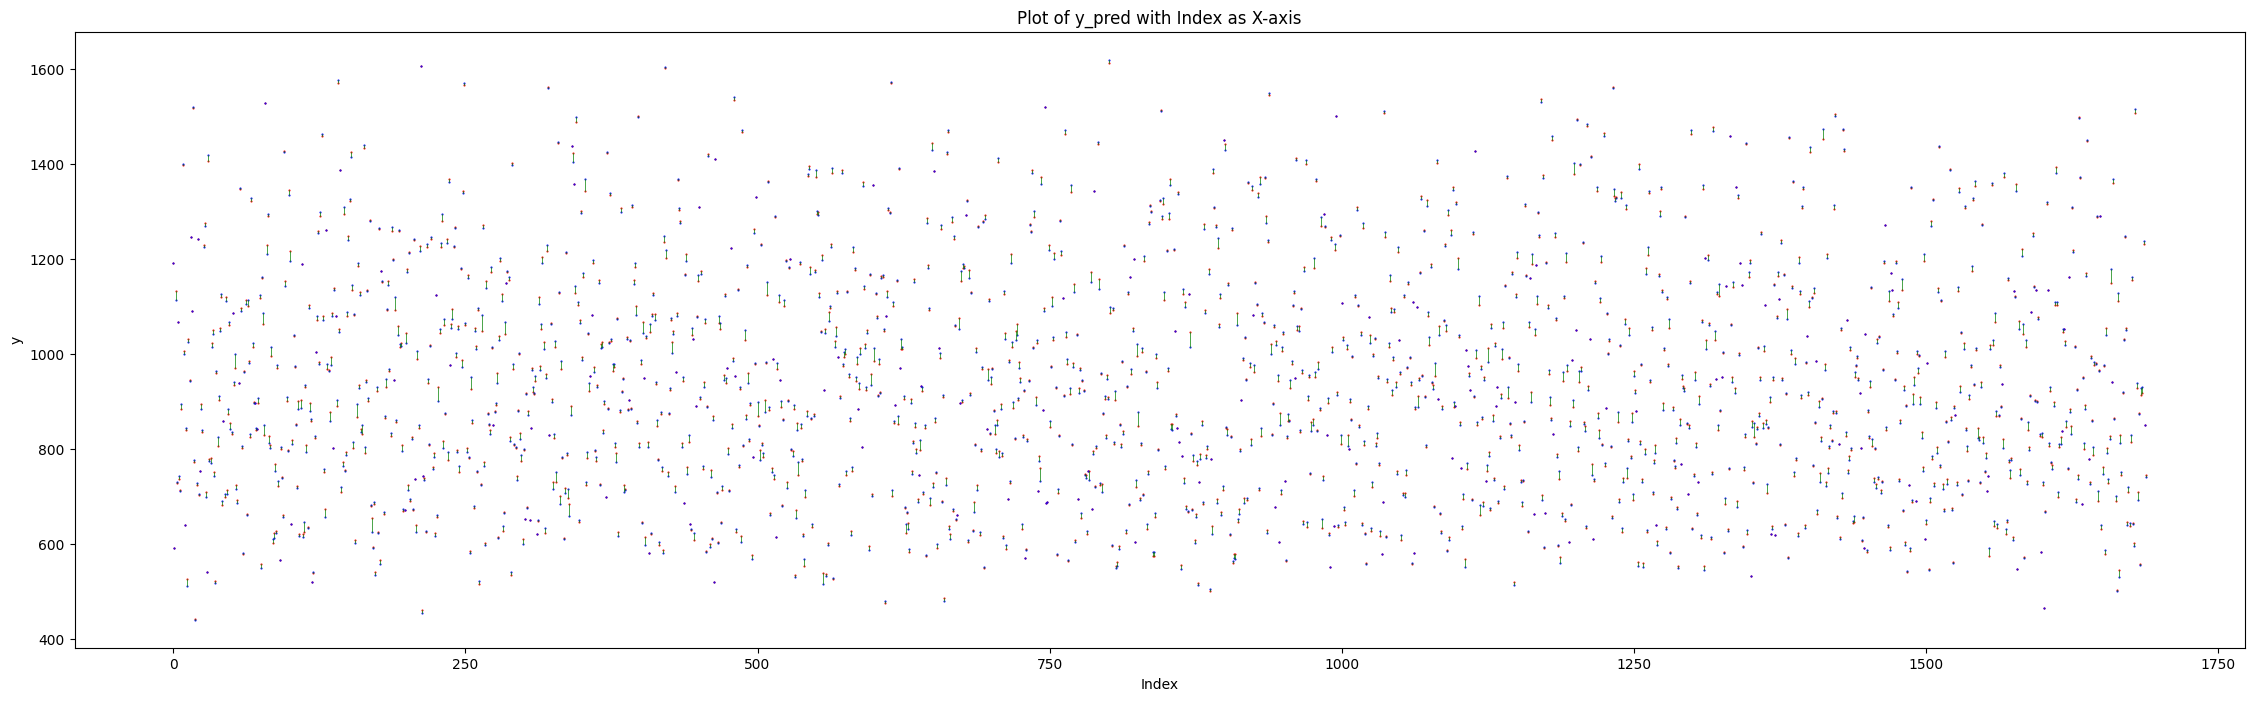

In [28]:
plotDiff(preds)

In [19]:
type(np.random.uniform(1000, 2000, size=size))

numpy.ndarray